# Lines

A line joins two points. In Euclidean space, this is the general equation of a line:
$$
    y = mx+c
$$

This notebook will play with two lines that intersect. We will find the point at which they intersect by using high-school algebra, then do it again using matrices. This will be our introduction to the power of linear algebra without.

In [1]:
import numpy as np
x = np.linspace(-12,12,24) # We set up the x domain.

In [2]:
m1 = 2
c1 = -4

In [3]:
def y(x: np.ndarray, m:np.ndarray, c: float):
    return m * x + c

In [4]:
y1 = y(x, m1, c1)

Let's plot this line

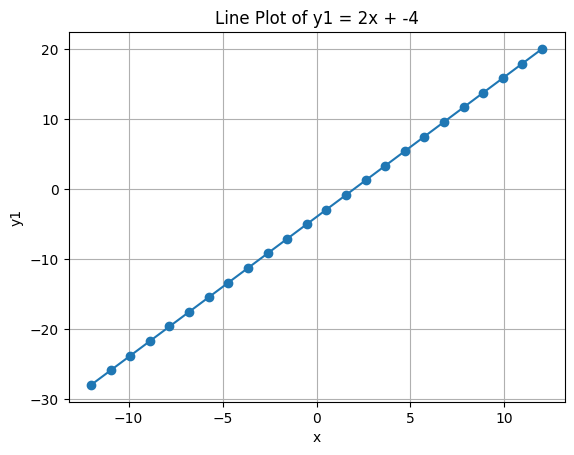

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create a line plot
plt.plot(x, y1, marker='o', linestyle='-')

plt.xlabel('x')
plt.ylabel('y1')
plt.title('Line Plot of y1 = {}x + {}'.format(m1, c1))

plt.grid(True)
plt.show()


Now create another line that intersects y1

In [6]:
m2 = -1
c2 = 3
y2 = y(x, m2, c2)

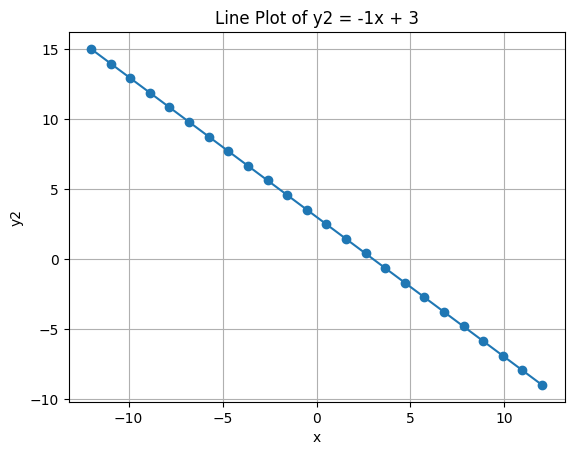

In [7]:
plt.plot(x, y2, marker='o', linestyle='-')

plt.xlabel('x')
plt.ylabel('y2')
plt.title('Line Plot of y2 = {}x + {}'.format(m2, c2))

plt.grid(True)
plt.show()

If we overlay these two plots, we can estimate where they cross.

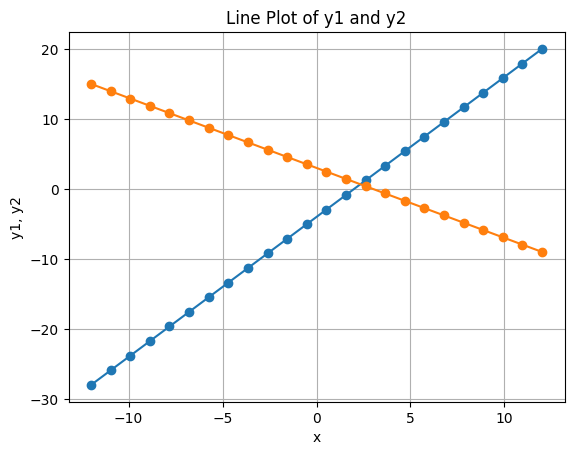

In [8]:
plt.plot(x, y1, marker='o', linestyle='-')
plt.plot(x, y2, marker='o', linestyle='-')

plt.xlabel('x')
plt.ylabel('y1, y2')
plt.title('Line Plot of y1 and y2'.format(m2, c2))

plt.grid(True)
plt.show()

We can estimate by eye that these cross at approximately (2.4, 0.5) or thereabouts. Let's calculate this using high-school simultaneous equations.

Start with the two equations:
$$
y = 2x - 4 ... (1)
$$
$$
y = -x + 3 ... (2)
$$
multiply the second equation by 2
$$
2y = -2x + 6 ... (3)
$$
Add (1) to (2)
$$
3y = 2
$$
$$
y = 2/3 = 0.66...
$$
If $y=\frac{2}{3}$ then 
$$
\frac{2}{3} = 2x -4
$$
$$
x = \frac{2+12}{6} = \frac{14}{6} = 2.33...
$$

This agrees with our estimate by eye showing the coordinate where the two lines cross happens at (2.33... , 0.6...)

But we can do this with matrices and the cool thing about that is the method is generalised to higher dimensions. Like three equations and three unknowns and higher.

Arrange the two equations to put the x and y variables and coefficients on the left, in the same oder x, then y. Put the constants on the right hand side:
$$
-2x + y = -4 ... (1)
$$
$$
x + y = 3 ... (2)
$$

The first step is to re-form the equations into a matrix representation which is to write the coefficient matrix, then multiply (on the right) by the x and y variables. We then use the equality symbol = and equate this to the constants in the equations:

$$
\begin{bmatrix}
    -2 & 1 \\
    1 & 1 \\
\end{bmatrix}
\begin{bmatrix}
    x \\
    y \\
\end{bmatrix}
=
\begin{bmatrix}
    -4 \\
    3 \\
\end{bmatrix}
$$
Let's assign some variables to these matices
$$
Av = b
$$

In [9]:
A = np.array([[-2, 1],
              [1, 1]])
b = np.array([-4,
             3])
print(A)
print(b)

[[-2  1]
 [ 1  1]]
[-4  3]


## Note:
For this purpose, matrix multiplication is done using an operation called the "dot product".

In the same way that we would solve a very simple equation line this:
$$
2 x = 10
$$
Rearrange, but don't use a fraction. Multiply by the INVERSE of 2 which is indicated by raising to the power -1. This is equivalent notation which translates well into matrix notation. 
$$
x = 10 \cdot 2^-1 = 5
$$
Our matrix equation becomes
$$
v = b \cdot A^-1
$$

# Inverse matrix
Assuming we can invert a matrix--and it's not always possible--we can solve for v by multiplying b by the inverse of A. How do we invert A?


In [10]:
A_inv = np.linalg.inv(A)
print(A_inv)

[[-0.33333333  0.33333333]
 [ 0.33333333  0.66666667]]


Let's check the result. In the same way that multyplying 2 by its inverse (1/2) will equal 1, we should find that multiplying A by its inverse give the identity matrix which is all zero except the diagonal from top left to bottom right.

In [11]:
print(np.dot(A, A_inv))  
# You will note that a zero might be approximated by a very small number. 
This is a consequence of using floating point numbers

[[ 1.00000000e+00  0.00000000e+00]
 [-5.55111512e-17  1.00000000e+00]]


That was easy. It's easy for small matrices. It's not so easy for large ones, but that's another story. So let's multiply b by the inverse of A and see what we get.

In [12]:
v = np.dot(A_inv, b)

In [13]:
print(v)  # This agrees with our high-school algebra method.

[2.33333333 0.66666667]


## Let's do an example without all the dialog

In [15]:
A = np.array([[-1, 5],[-3, 1]])
b = np.array([8,8])
A_inv = np.linalg.inv(A)
print(np.dot(A_inv, b))

[-2.28571429  1.14285714]


# Summary

This notebook covered the topic of a "line" but hints at how linear algebra is useful for finding the intersection of two lines (assuming they are not parallel). For two lines that intersect, the matrix form of the coefficients is invertable which leads immediately to a way to find the intersection.

Although this simple example only uses a 2 x 2 matrix the same notation, and the same code illustrated above will work for 3 x 3 and up. This is very powerful when you find that inverting a matrix facilitates solutions to minimisation problems.

A minimisation problem is common in statistical techniques like for example linear regression. In machine learning we are iterating over a large amount of data, slightly modifying coefficients, and then testing a result for goodness of fit. This test will populate a set of error-values, and we can use linear regression to check whether we have found the minimum error. If so, then the algorithm can stop, and we present the answer.

Text-book matrix inversion is not very efficient for a large matrix and so we find that scientific libraries will employ many shortcuts and sometimes approximations for coping with large amount of data.

You can read more about matrix inversion here: https://mathworld.wolfram.com/MatrixInverse.html